# Artificial Intelligence for Robotics
* Path Smoothing

In [45]:
# -----------
# Define a function smooth that takes a path as its input
# (with optional parameters for weight_data, weight_smooth,
# and tolerance) and returns a smooth path. The first and 
# last points should remain unchanged.
#
# Smoothing should be implemented by iteratively updating
# each entry in newpath until some desired level of accuracy
# is reached. The update should be done according to the
# gradient descent equations given in the instructor's note
# below (the equations given in the video are not quite 
# correct).
# -----------

from copy import deepcopy

# thank you to EnTerr for posting this on our discussion forum
def printpaths(path,newpath):
    for old,new in zip(path,newpath):
        print '['+ ', '.join('%.3f'%x for x in old) + \
               '] -> ['+ ', '.join('%.3f'%x for x in new) +']'

# Don't modify path inside your function.
path = [[0, 0],
        [0, 1],
        [0, 2],
        [1, 2],
        [2, 2],
        [3, 2],
        [4, 2],
        [4, 3],
        [4, 4]]

def smooth(path, weight_data = 0.5, weight_smooth = 0.1, tolerance = 0.000001):

    # Make a deep copy of path into newpath
    newpath = deepcopy(path)

    change = tolerance
    while change >= tolerance:
        change = 0
        for i in range(1,len(path) - 1):
            for j in range(len(path[0])):
                oldpath = newpath[i][j]
                newpath[i][j] += weight_data * (path[i][j] - newpath[i][j]) + weight_smooth * (newpath[i+1][j] + newpath[i-1][j] - 2 * newpath[i][j])
                change += abs(newpath[i][j] - oldpath) 
    return newpath

In [46]:
printpaths(path,smooth(path))

[0.000, 0.000] -> [0.000, 0.000]
[0.000, 1.000] -> [0.021, 0.979]
[0.000, 2.000] -> [0.149, 1.851]
[1.000, 2.000] -> [1.021, 1.979]
[2.000, 2.000] -> [2.000, 2.000]
[3.000, 2.000] -> [2.979, 2.021]
[4.000, 2.000] -> [3.851, 2.149]
[4.000, 3.000] -> [3.979, 3.021]
[4.000, 4.000] -> [4.000, 4.000]


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(oldpath, newpath):
    plt.rcParams.update({'figure.figsize': (len(path)/2,len(path)/2)})
    x = []
    y = []
    y_max = max(path)[0]
    y_min = 0
    x_max = 0
    x_min = 0
    for i in range(len(oldpath)):
        y.append(oldpath[i][0])
        x.append(oldpath[i][1])
        if oldpath[i][1] > x_max:
            x_max = path[i][1]
    plt.plot(x, y, linewidth=4.0, linestyle = '-', color = 'r')
    plt.hold('on')
    
    x = []
    y = []
    for i in range(len(newpath)):
        y.append(newpath[i][0])
        x.append(newpath[i][1])
        if newpath[i][1] > x_max:
            x_max = path[i][1]

    plt.plot(x, y, linewidth=4.0, linestyle = '-', color = 'b')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()
    plt.xticks(range(x_min,x_max+1))
    plt.yticks(range(y_min,y_max+1))
    plt.xlabel('columns')
    plt.ylabel('rows')
    plt.grid(color='k', linestyle=':', linewidth=1)
    plt.axis('equal')
    plt.gca().invert_yaxis()

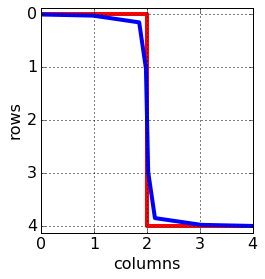

In [52]:
make_plot(path,smooth(path,))

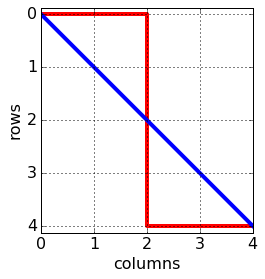

In [49]:
make_plot(path,smooth(path,0,0.1))

In [51]:
printpaths(path,smooth(path,0,0.1))

[0.000, 0.000] -> [0.000, 0.000]
[0.000, 1.000] -> [0.500, 0.500]
[0.000, 2.000] -> [1.000, 1.000]
[1.000, 2.000] -> [1.500, 1.500]
[2.000, 2.000] -> [2.000, 2.000]
[3.000, 2.000] -> [2.500, 2.500]
[4.000, 2.000] -> [3.000, 3.000]
[4.000, 3.000] -> [3.500, 3.500]
[4.000, 4.000] -> [4.000, 4.000]
